In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import GEMA
from keras.datasets import mnist

/home/egor/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-04-04 11:02:01.526448: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 11:02:01.690019: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 11:02:01.691051: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 11:02:02.917548: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [4]:
train_x_rsh = train_X.reshape(60000, 784)[0: 10000]
train_y_rsh = train_y.reshape(60000, 1)[0: 10000]

In [5]:
print(train_x_rsh.shape)
print(train_y_rsh.shape)
train = np.column_stack([train_y_rsh, train_x_rsh])

(10000, 784)
(10000, 1)


In [6]:
main_map = GEMA.Map(train_x_rsh,
                    10,
                    10000,
                    initial_lr=0.1,
                    initial_neighbourhood=0,
                    distance='euclidean',
                    use_decay=False,
                    normalization='none',
                    presentation='random',
                    weights='random')
main_classification = GEMA.Classification(main_map, train, tagged=1)
GEMA.Visualization.heat_map(main_classification)


TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
fig, ax = plt.subplots()

m = main_classification.classification_map
mp = m.pivot_table(index='x', columns='y', values='labels', aggfunc='median')

# for x in range(10):
#     for y in range(10):
#         ax.scatter(x, y, s=mp[x][y] * 10, color='b')

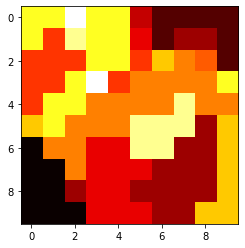

In [29]:
plt.imshow(mp, cmap='hot', interpolation='nearest')
plt.show()

In [30]:
mp

y,0,1,2,3,4,5,6,7,8,9
x,,,,,,,,,,
0,7.0,7.0,9.0,7.0,7.0,2.5,1.0,1.0,1.0,1.0
1,7.0,4.0,8.0,7.0,7.0,3.0,1.0,2.0,2.0,1.0
2,4.0,4.0,4.0,7.0,7.0,4.0,6.0,5.0,4.5,1.0
3,4.0,4.0,7.0,9.0,4.0,5.0,5.0,5.0,5.0,7.0
4,4.0,7.0,7.0,5.0,5.0,5.0,5.0,8.0,5.0,5.0
5,6.0,7.0,5.0,5.0,5.0,8.0,8.0,8.0,2.0,6.0
6,0.0,5.0,5.0,3.0,3.0,8.0,8.0,2.0,2.0,6.0
7,0.0,0.0,5.0,3.0,3.0,3.0,2.0,2.0,2.0,6.0
8,0.0,0.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,6.0
